In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df = pd.read_csv("beer-servings.csv")
df

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [313]:
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [314]:
# df.drop('Unnamed: 0', axis = 1 inplace=True)

In [315]:
df = pd.read_csv("beer-servings.csv", index_col='Unnamed: 0')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [316]:
df.shape

(193, 6)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [318]:
df.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [319]:
# df.isnull().sum()

### Filling Missing Values

In [320]:
### Method 1

In [321]:
df.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [322]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [323]:
num_cols =df[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [324]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [325]:
from sklearn.impute import SimpleImputer

In [326]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [327]:
type(num_cols)

numpy.ndarray

In [328]:
num_cols = pd.DataFrame(num_cols, columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [329]:
type(num_cols)

pandas.core.frame.DataFrame

In [330]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [331]:
df.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'], axis = 1, inplace=True)

In [332]:
df.isna().sum()

country      0
continent    0
dtype: int64

In [333]:
df.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [334]:
df = pd.concat([num_cols, df], axis = 1)
df.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [335]:
df.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [336]:
df = pd.read_csv("beer-servings.csv", index_col='Unnamed: 0')

In [337]:
df.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [338]:
### Method 2

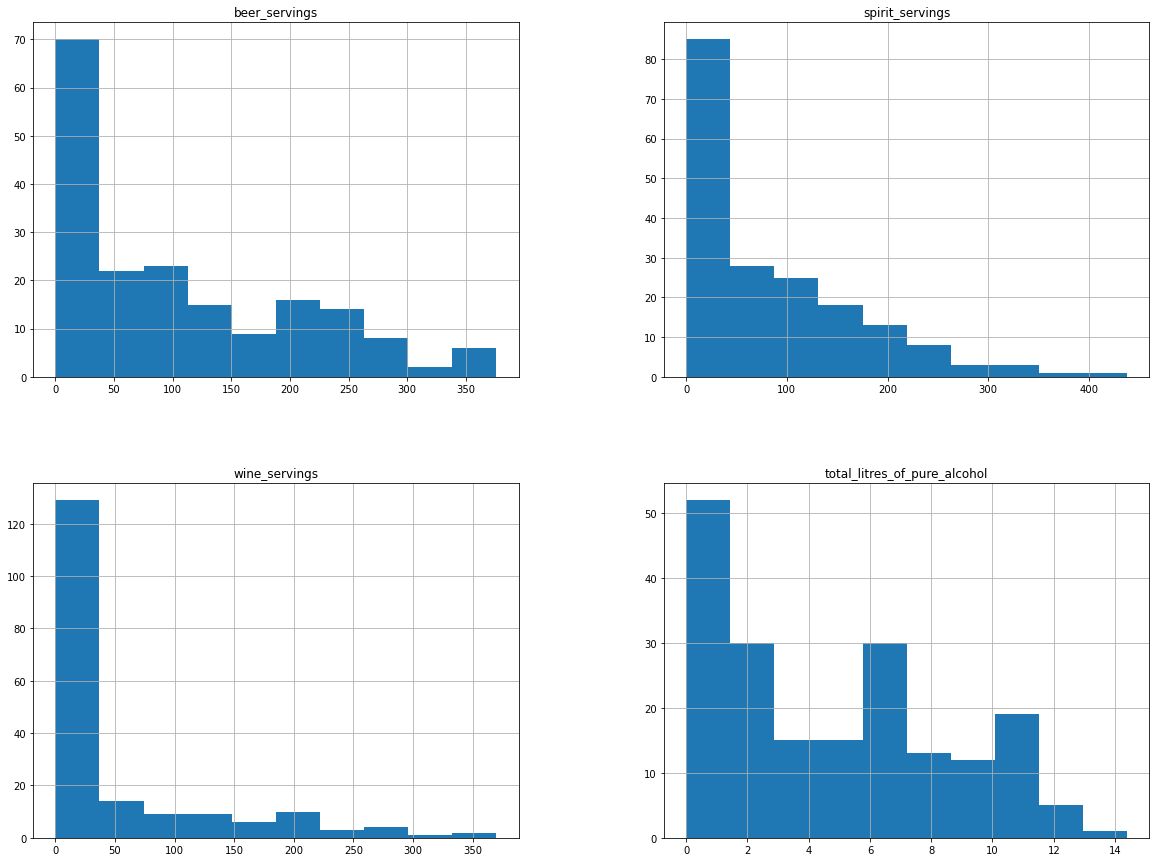

In [339]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [340]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [341]:
df['beer_servings'] = df['beer_servings'].fillna(df['beer_servings'].median())

In [342]:
df['beer_servings'].isna().sum()

0

In [343]:
for i in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
    df[i] = df[i].fillna(df[i].median())

In [344]:
df.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

### Managing Outliers 

Text(0.5, 1.0, 'Boxplot of Beer Servings column')

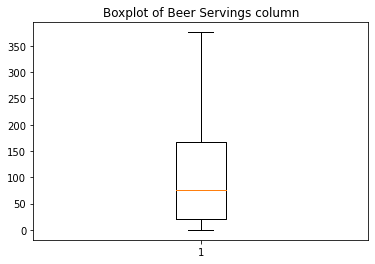

In [391]:
plt.boxplot(df['beer_servings'])
plt.title('Boxplot of Beer Servings column')

In [392]:
df['beer_servings'].median()

76.0

Text(0.5, 1.0, 'Boxplot of Spirit Servings column')

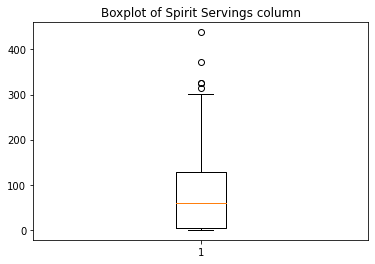

In [346]:
plt.boxplot(df['spirit_servings'])
plt.title('Boxplot of Spirit Servings column')

In [347]:
Q1 = np.percentile(df['spirit_servings'], 25, interpolation='midpoint')
Q2= np.percentile(df['spirit_servings'], 50,interpolation='midpoint')
Q3 = np.percentile(df['spirit_servings'], 75,interpolation='midpoint')

In [348]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [371]:
df['spirit_servings'].median()

60.0

In [350]:
IQR = Q3 - Q1
print(IQR)

123.0


In [351]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [352]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [380]:
outlier=[]
for x in df['spirit_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [354]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [355]:
ind = df['spirit_servings']>up_lim

In [356]:
df.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
df.drop([15, 68, 73, 141, 144], inplace=True)

In [362]:
df.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
3,Andorra,245.0,138.0,312.0,12.40,Europe
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6,Argentina,76.0,25.0,221.0,8.30,South America
7,Armenia,21.0,179.0,11.0,3.80,Europe
8,Australia,261.0,72.0,212.0,10.40,Oceania
9,Austria,279.0,75.0,191.0,9.70,Europe


Text(0.5, 1.0, 'Boxplot of Wine Servings column')

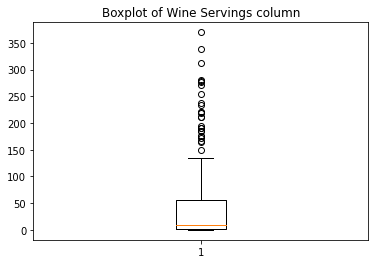

In [365]:
plt.boxplot(df['wine_servings'])
plt.title('Boxplot of Wine Servings column')

In [369]:
Q1 = np.percentile(df['wine_servings'], 25, interpolation='midpoint')
Q2= np.percentile(df['wine_servings'], 50,interpolation='midpoint')
Q3 = np.percentile(df['wine_servings'], 75,interpolation='midpoint')

In [372]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [374]:
df['wine_servings'].median()

9.0

In [376]:
IQR = Q3 - Q1
print(IQR)

56.5


In [378]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [381]:
print(low_lim)
print(up_lim)

-83.75
142.25


In [383]:
outlier=[]
for x in df['spirit_servings']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [385]:
outlier

[179.0,
 176.0,
 173.0,
 173.0,
 145.0,
 252.0,
 192.0,
 254.0,
 154.0,
 170.0,
 286.0,
 147.0,
 194.0,
 151.0,
 302.0,
 215.0,
 202.0,
 246.0,
 216.0,
 152.0,
 244.0,
 189.0,
 200.0,
 160.0,
 186.0,
 215.0,
 226.0,
 205.0,
 221.0,
 293.0,
 157.0,
 178.0,
 258.0,
 156.0,
 237.0,
 158.0]

Text(0.5, 1.0, 'Boxplot of Total_litres_of_pure_alcohol column')

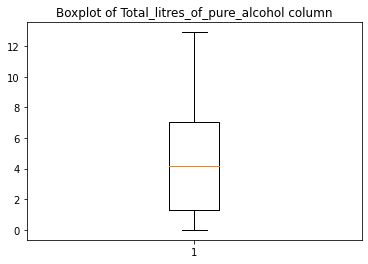

In [389]:
plt.boxplot(df['total_litres_of_pure_alcohol'])
plt.title('Boxplot of Total_litres_of_pure_alcohol column')

In [390]:
df['total_litres_of_pure_alcohol'].median()

4.2